# _automaton_.shortest(_num_ = None, _len_ = None)

Return a (finite) approximation of the behavior of the automaton controled by the length of the words.  In other words, compute the polynomial of the first accepted words (according to the shortlex order), and their associated weight.

Arguments:
- `num` the number of words to find (there might be fewer).  `None` stands for $\infty$ if `len` is specified, 1 otherwise.
- `len` the maximum length of the words to find. `None` stands for $\infty$.

Default values are handled as follows:
<table>
    <tr>
        <td></td>
        <td>len = None</td>
        <td>len = $\ell$</td>
    </tr>
    <tr>
        <td>num = None</td>
        <td>$1, \infty$</td>
        <td>$\infty, \ell$</td>
    </tr>
    <tr>
        <td>num = $n$</td>
        <td>$n, \infty$</td>
        <td>$n, \ell$</td>
    </tr>
</table>

Preconditions:
- the automaton must not have spontaneous cycles

See also:
- [_automaton_.evaluate](automaton.evaluate.ipynb)
- [automaton.lightest](automaton.lightest.ipynb)
- [_expression_.shortest](expression.shortest.ipynb)

## Examples

In [1]:
import vcsn

### Boolean Automata

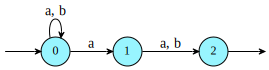

In [2]:
a = vcsn.context('lal_char(ab), b').de_bruijn(1)
a

Calling `a.shortest()` is equivalent to `a.shortest(1)` which is equivalent to `a.shortest(1, 0)`: find the shortest word, whatever its length:

In [3]:
a.shortest()

aa

To get the first four words, use `a.shortest(4)` (or `a.shortest(len = 4)`):

In [4]:
a.shortest(4)

aa + ab + aaa + aab

The words with at most four letters:

In [5]:
a.shortest(len=4)

aa + ab + aaa + aab + baa + bab + aaaa + aaab + abaa + abab + baaa + baab + bbaa + bbab

At most 10 words of at most 4 letters:

In [6]:
a.shortest(num=10, len=4)

aa + ab + aaa + aab + baa + bab + aaaa + aaab + abaa + abab

At most 10 words of at most 3 letters:

In [7]:
a.shortest(num=10, len=3)

aa + ab + aaa + aab + baa + bab

### Weighted Automata

The following automaton decodes binary numbers.

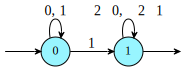

In [8]:
%%automaton -s bin
context = "lal_char(01), z"
$ -> 0
0 -> 0 0, 1
0 -> 1 1
1 -> $
1 -> 1 <2>0, <2>1

In [9]:
bin.shortest(len=3)

1 + 01 + <2>10 + <3>11 + 001 + <2>010 + <3>011 + <4>100 + <5>101 + <6>110 + <7>111

In [10]:
bin.shortest(num=10)

1 + 01 + <2>10 + <3>11 + 001 + <2>010 + <3>011 + <4>100 + <5>101 + <6>110

### Transducers
The following automaton maps words to words.  The length of a multitape words is the largest length of its components: $\mathsf{len}(abc|x) = 3$.

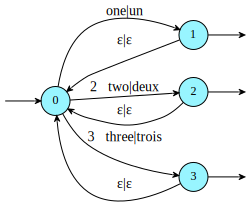

In [11]:
%%automaton -s t
context = "lat<law<char>, law<char>>, q"
$ -> 0
0 -> 1 <1>one|un
0 -> 2 <2>two|deux
0 -> 3 <3>three|trois
1 -> 0 \e|\e
2 -> 0 \e|\e
3 -> 0 \e|\e
1 -> $
2 -> $
3 -> $

In [12]:
t.shortest(num=10, len=9)

one|un + <2>two|deux + <3>three|trois + oneone|unun + <2>onetwo|undeux + <2>twoone|deuxun + <4>twotwo|deuxdeux + <3>onethree|untrois + <3>threeone|troisun + <6>threetwo|troisdeux